## Import Data

In [14]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
df = pd.read_csv('users.dataset.public.csv')
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

# Data Cleaning

In [6]:
#checking to missing value
df.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [7]:
 # checking to skewness in data
df.skew()

identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
hasAnyApp                1.067204
hasAndroidApp            4.192538
hasIosApp                1.368601
hasProfilePicture       -7.015544
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: float64

# Data Visualization

Text(0.5, 1.0, 'hasAnyApp Bins')

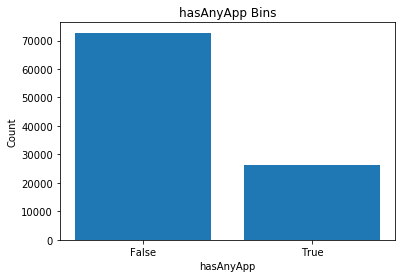

In [15]:
# group by names
group_names=['False','True']
q=pyplot.bar(group_names, df['hasAnyApp'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("hasAnyApp")
plt.pyplot.ylabel("Count")
plt.pyplot.title("hasAnyApp Bins")

The figure shows that many users do not use the application

In [16]:
# group by user who has any apps
df_group_two = df[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two

productsBought           productsSold          
                     sum      mean          sum      mean
hasAnyApp                                                
False               7957  0.109391         3233  0.044447
True                9049  0.345725         8794  0.335982

Mobile application users make purchases more often than users who do not use the mobile application.

Text(0.5, 1.0, 'civilityTitle Bins')

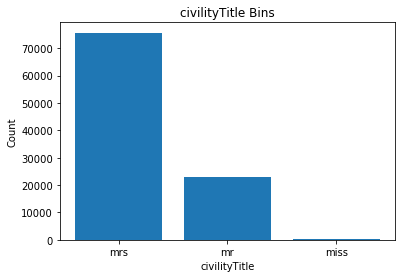

In [17]:
# group by gender
group_names=['mrs','mr','miss']
pyplot.bar(group_names, height=df['civilityTitle'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("civilityTitle")
plt.pyplot.ylabel("Count")
plt.pyplot.title("civilityTitle Bins")

Active users are married women

In [12]:
df_group_one = df[['civilityTitle','productsBought','productsSold']]
df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
df_group_one

productsBought           productsSold          
                         sum      mean          sum      mean
civilityTitle                                                
miss                     287  0.656751          574  1.313501
mr                      4262  0.186995         2673  0.117278
mrs                    12457  0.164592         8780  0.116009

Single female has high purchase power or rating

Text(0.5, 1.0, 'language Bins')

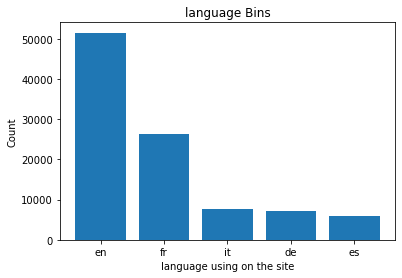

In [18]:
# group by language speaking users
group_names=['en', 'fr', 'it', 'de', 'es']
q=pyplot.bar(group_names, df['language'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("language using on the site")
plt.pyplot.ylabel("Count")
plt.pyplot.title("language Bins")

In [19]:
df_group_three = df[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

productsBought           productsSold          
                    sum      mean          sum      mean
language                                                
de                 1705  0.237531          539  0.075091
en                 8918  0.172950         4877  0.094581
es                  797  0.132107          901  0.149345
fr                 4386  0.166313         3004  0.113909
it                 1200  0.154520         2706  0.348442

Users in German often make purchases.

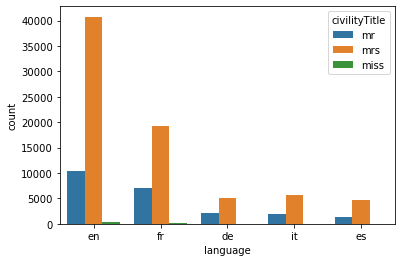

In [20]:
import seaborn as sns
sns.countplot(x='language',data=db,hue='civilityTitle') 

countplot tells us that married women are most English speakers

## Segment of Users

In [21]:
repeat_columns = []
# need to delete unused and frequently repeated data

repeat_columns += ['identifierHash', 'type','country','gender','civilityTitle']
db1=df.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


Encode of Variables (кодировака переменных)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = df[[var]] #use double brakets to make sure i'm taking a dataframe 
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True)

db2 = db1.drop(string_columns, axis = 1)
db2.head()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   daysSinceLastLogin         98913 non-null  int64  
 10  seniority                  98913 non-null  int64  
 11  seniorityAsMonths          98913 non-null  float64
 12  seniorityAsYears           98913 non-null  float64
 13  language_encoded           98913 non-null  flo

Correlation matrix

Text(0.5, 1, 'Correlation Matrix for All Users')

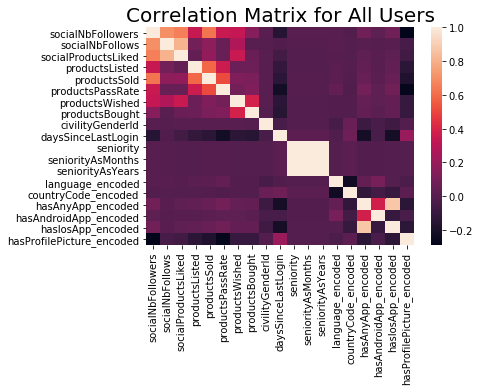

In [33]:
import seaborn as sns
a=sns.heatmap(db2.corr()) 
a.set_title('Correlation Matrix for All Users', fontsize = 20)

daysSinceLastLogin variable and hasProfilePicture: seems to be negatively correlated with either variable. Only 1.95% of users did not have an avatar.

In [24]:
#remove variables with no correlations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']

db3 = db2.drop(no_columns, axis = 1)

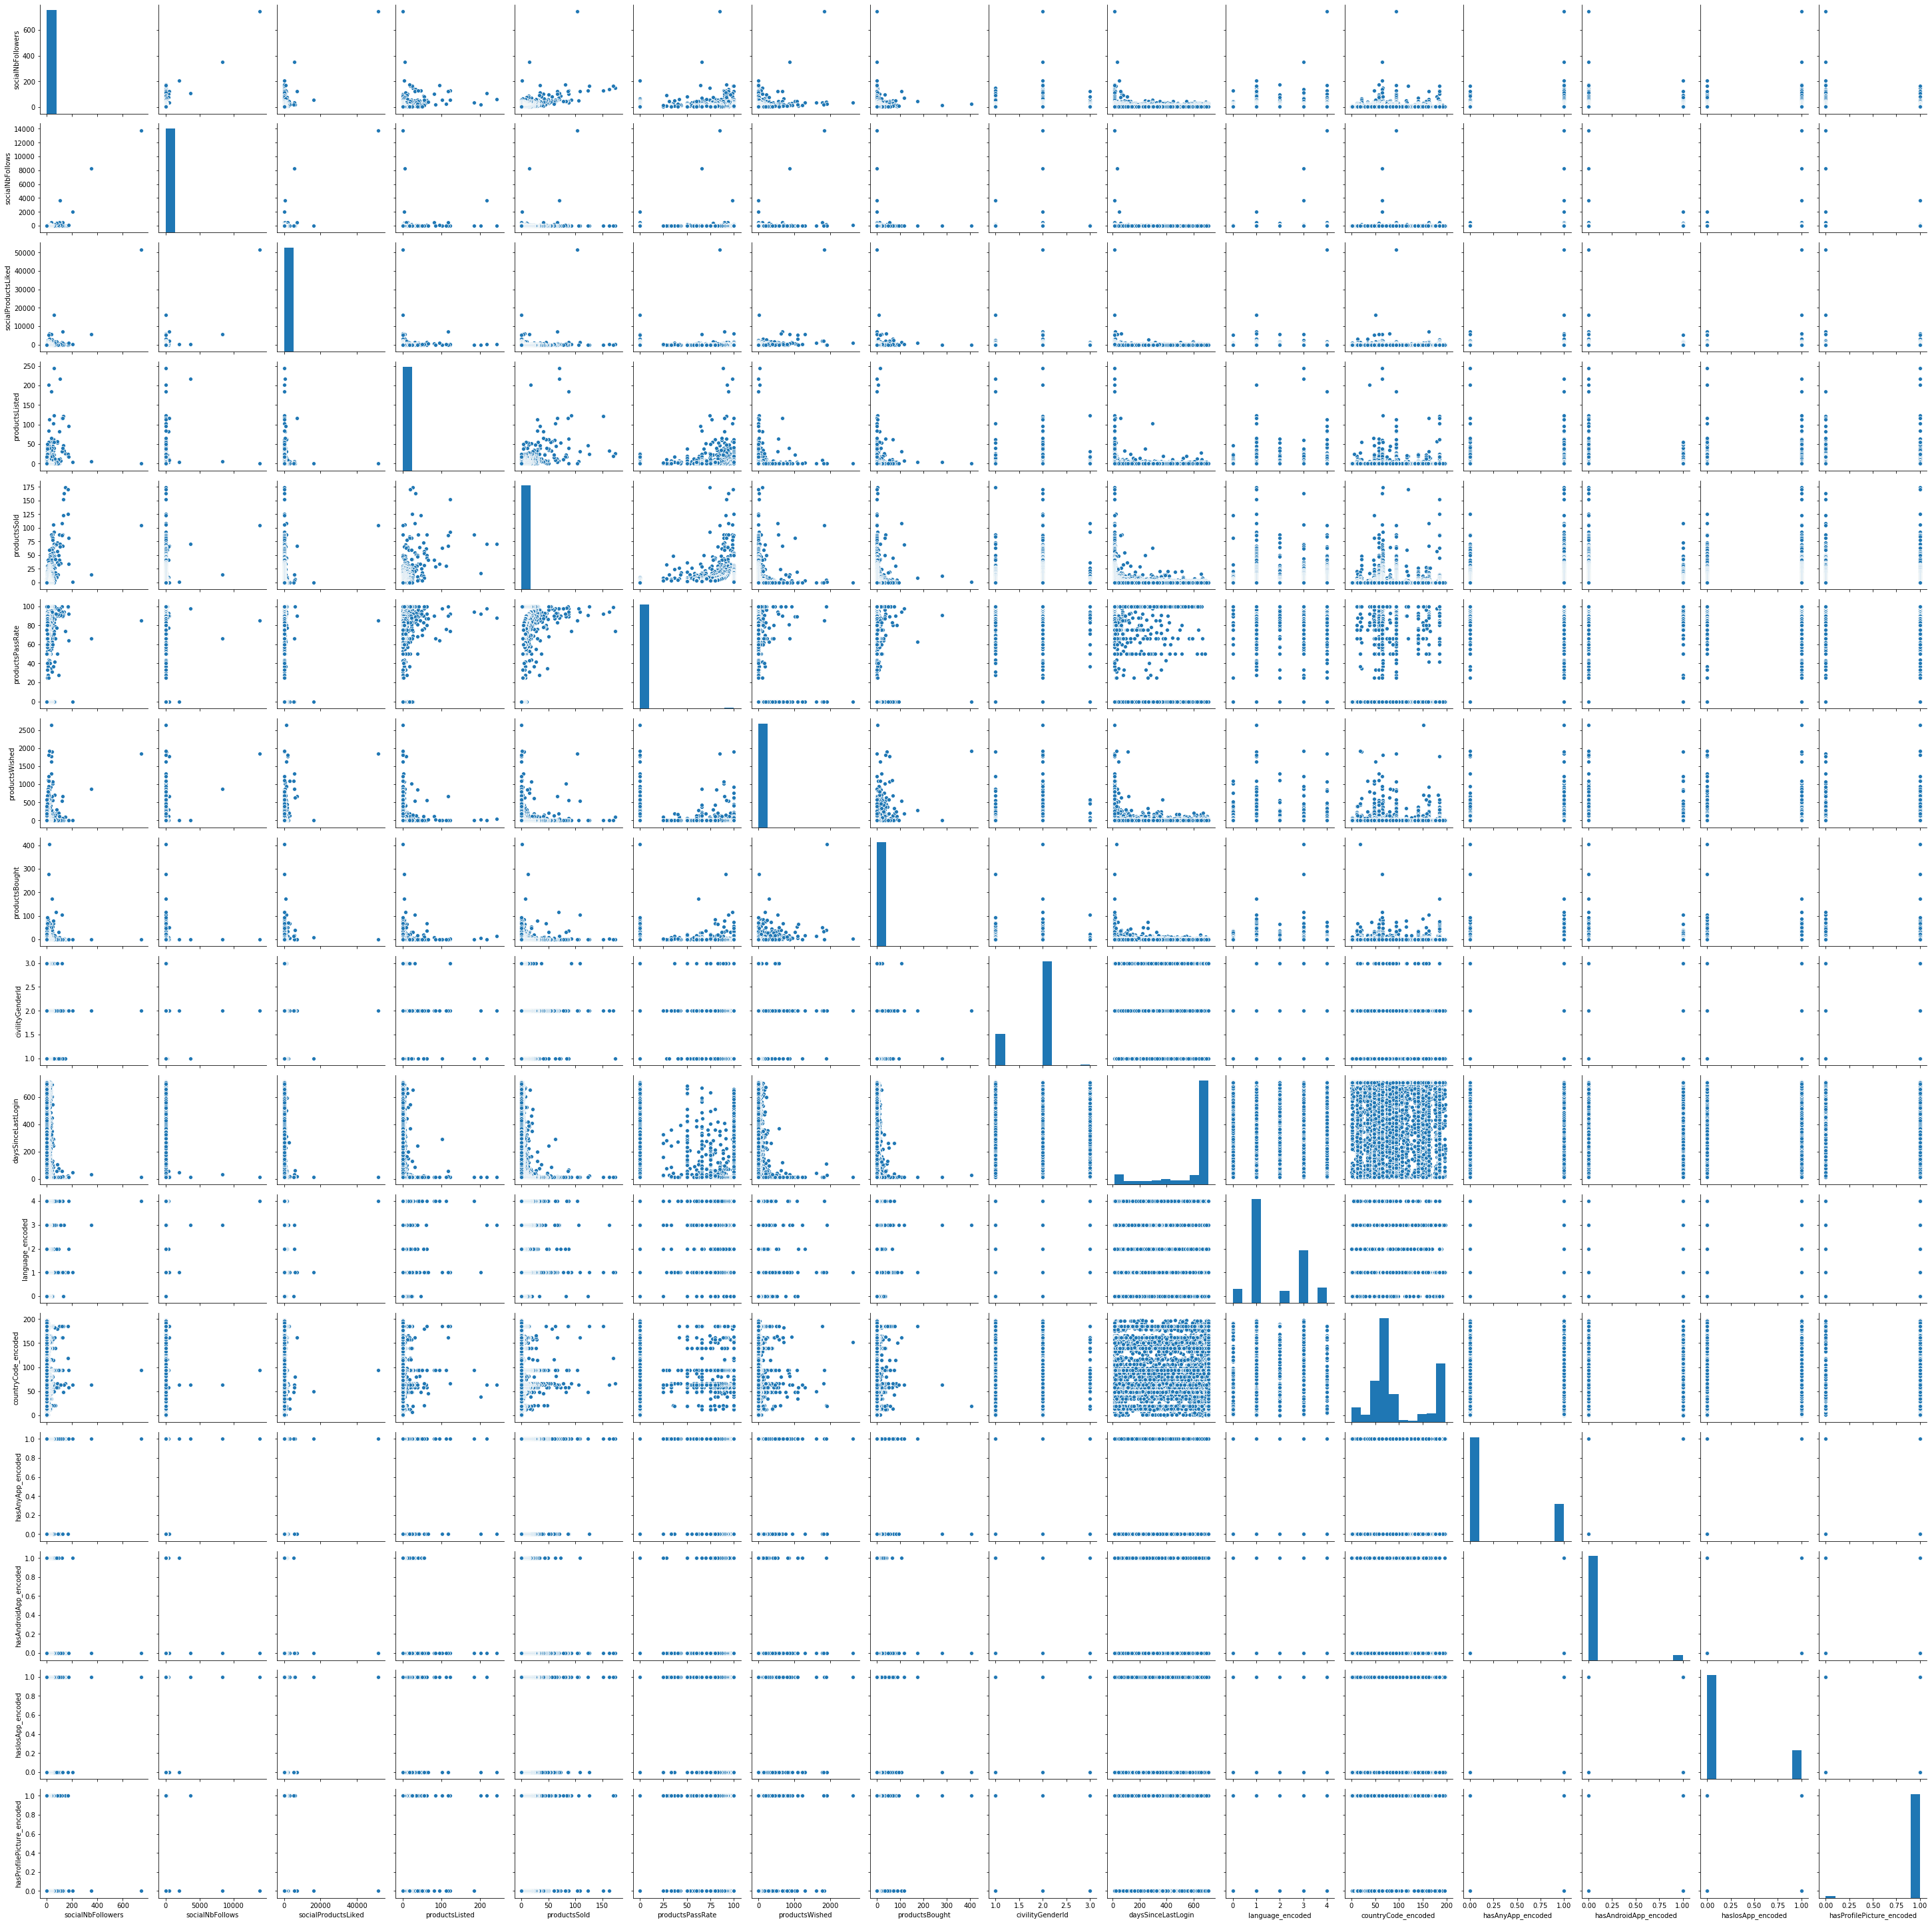

In [25]:
sns.pairplot(db3) # Parplot helps to get one to one relation between all attributes in dataset

Sample choosing for dendogram


In [35]:
print("Dataset before filtering", df.shape)
print("Remainging data after filtering variables with no correlations:\n",db3.shape)
db_final = db3.sample(frac = 0.3)
print("\n Final Columns after Reduction: \n",db_final.columns)
print("\n Final data after reduction: \n",db_final.shape)

Dataset before filtering (98913, 24)
Remainging data after filtering variables with no correlations:
 (98913, 16)

 Final Columns after Reduction: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded'],
      dtype='object')

 Final data after reduction: 
 (29674, 16)


In [37]:
# using Jeffrey's Helpers to filter dataframes 

def helper_has_fields_compared_to(df, columns, target, what, operator):
   
    #Helper to compare several columns to the same value.

    col = columns[0]
    if operator == '>':
        res = (df[col] > target)
    elif operator == '>=':
        res = (df[col] >= target)
    elif operator == '<=':
        res = (df[col] <= target)
    elif operator == '<':
        res = (df[col] < target)
    elif operator == '==':
        res = (df[col] == target)
    elif operator == '!=':
        res = (df[col] != target)  
    for col in columns[1:]:
        if operator == '>':
            tmp = (df[col] > target)
        elif operator == '>=':
            tmp = (df[col] >= target)
        elif operator == '<=':
            tmp = (df[col] <= target)
        elif operator == '<':
            tmp = (df[col] < target)
        elif operator == '==':
            tmp = (df[col] == target)
        elif operator == '!=':
            tmp = (df[col] != target)
        if what == 'all':
            res = res & tmp
        elif what in ['any']:
            res = res | tmp
    return res

def helper_has_any_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is greater than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'any', '>')
    return res

def helper_has_any_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'any', '<')
    return res

def helper_has_all_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '>')
    return res

def helper_has_all_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '<')
    return res

def helper_has_all_field_equal_to(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is equal to the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '==')
    return res

In [38]:
# Total Users
print(f"Total users: {db3.shape[0]} records with {db3.shape[1]} columns")

# Inactive Users
Inactive_db=db3[helper_has_all_field_smaller_than(db3,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],1)]
Inactive_db.dataframeName = "Inactive Users"
print(f"Inactive users: {Inactive_db.shape[0]} records with {Inactive_db.shape[1]} columns")
#Inactive_db.sample(12)

# Active Users
Active_db=db3[helper_has_any_field_greater_than(db3,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],0)]
Inactive_db.dataframeName = "Active Users"
print(f"Active users: {Active_db.shape[0]} records with {Active_db.shape[1]} columns")

Total users: 98913 records with 16 columns
Inactive users: 77274 records with 16 columns
Active users: 21639 records with 16 columns


In [39]:
# Actual Users with at least one bought or sold
Users_db = db3[helper_has_any_field_greater_than(db3,['productsSold','productsBought'],0)]
print(f"Actual Users: {Users_db.shape[0]} ")
#Users_db.sample(12)

# Active Actual Users with social interaction except transaction
AActive_db = Users_db[helper_has_any_field_greater_than(Users_db,['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
AActive_db.dataframeName = "Active Actual Users"
print(f"Actal Active Users: {AActive_db.shape[0]}")
#Active_db.sample(12)

## Actual Buyers
buyers_db = db3[db3.productsBought > 0]
buyers_db.dataframeName = "Buyers"
print("Actual buyers: ", buyers_db.shape[0])


## Sellers
sellers_db = db3[(db3.productsListed > 0) | (db3.productsSold > 0)]
sellers_db.dataframeName = "Prospecting Sellers"
print("Prospecting sellers: ",sellers_db.shape[0])

### actual sellers (at least 1 product sold)
successful_sellers_db = db3[db3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Actual sellers: ", successful_sellers_db.shape[0])

# Social Users with no transaction but social interaction
#by looking at the data, we could easily conclude that 
# each new account is automatically assigned 3 followers and 8 accounts to follow
social_db = db3[ (db3['socialNbFollowers'] != 3) | (db3['socialNbFollows'] != 8) ]
social_db1=social_db[helper_has_all_field_smaller_than(social_db,['productsSold','productsBought'],1)]
#Among those social users, filter only those active on products 
market_social_db = social_db1[helper_has_any_field_greater_than(social_db1, ['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
print(f"Potential Social Users: {market_social_db.shape[0]}")
#market_social_db.sample(12)

Actual Users: 6893 
Actal Active Users: 4894
Actual buyers:  5419
Prospecting sellers:  2719
Actual sellers:  2036
Potential Social Users: 3679


In [40]:
print(f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:""")

#successful buyers
Sbuyers_db = db3[db3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])
buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64